In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Importing all the related files i.e nifty50,dow jones,s&p500,nasdaq , Niftybees ETf.
niftybees = pd.read_csv("C:\\Users\\Dell\\Downloads\\NIFTYBEES.csv")
niftyfifty = pd.read_csv("C:\\Users\\Dell\\Downloads\\NSEI.csv")
dowjones = pd.read_csv("C:\\Users\\Dell\\Downloads\\Dj.csv")
nasdaq = pd.read_csv("C:\\Users\\Dell\\Downloads\\Nasdaq.csv")
sp500 = pd.read_csv("C:\\Users\\Dell\\Downloads\\SP500.csv")

In [313]:
#Overview.
niftybees.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close1,long,Passive_strategy
0,2019-06-10,125.300003,125.918999,124.943001,125.674004,125.674004,829800.0,125.622002,-0.052002,-0.052002
1,2019-06-11,126.000000,126.500000,125.000000,125.622002,125.622002,150920.0,125.072998,-0.549004,-0.601006
2,2019-06-12,126.099998,126.099998,124.901001,125.072998,125.072998,157390.0,125.420998,0.348000,-0.253006
3,2019-06-13,125.400002,125.495003,124.550003,125.420998,125.420998,183450.0,124.516998,-0.904000,-1.157006
4,2019-06-14,125.029999,125.250000,124.309998,124.516998,124.516998,319440.0,123.083000,-1.433998,-2.591004


In [213]:
#Caluclating differnce between two consecutive days.
indicepanel = pd.DataFrame(index = niftybees.index)
indicepanel['niftybees'] = niftybees['Close'] - niftybees['Open']
indicepanel['niftybees_lag1'] = indicepanel['niftybees'].shift(1)
indicepanel['niftyfifty'] = niftyfifty['Close'] - niftybees['Open']
indicepanel['dowjones'] = dowjones['Open'].shift(-1) - dowjones['Open']
indicepanel['nasdaq'] = nasdaq['Open'].shift(-1) - nasdaq['Open']
indicepanel['sp500'] = sp500['Open'].shift(-1) - sp500['Open']
indicepanel['price'] = niftybees['Open']
indicepanel.head()


,niftybees,niftybees_lag1,niftyfifty,dowjones,nasdaq,sp500,price
0,0.374001,NaN,11797.400192,90.369141,102.169922,17.439942,125.300003
1,-0.377998,0.374001,11839.599609,-140.289063,-97.910156,-20.540040,126.000000
2,-1.027000,-0.377998,11780.100197,-3.361328,19.430176,3.510010,126.099998
3,0.020996,-1.027000,11788.649803,39.419922,-15.370118,0.580078,125.400002
4,-0.513001,0.020996,11698.269806,32.169922,12.240235,2.929932,125.029999


In [205]:
#Calculatin how many "NAN" are there.
indicepanel.isnull().sum()

niftybees         245
niftybees_lag1    245
niftyfifty        245
dowjones          245
nasdaq            245
sp500             245
price             245
dtype: int64

In [184]:
#Removing all the "NAN" .
indicepanel = indicepanel.fillna(method = 'ffill')
indicepanel = indicepanel.dropna()

In [185]:
indicepanel.isnull().sum()

niftybees         0
niftybees_lag1    0
niftyfifty        0
dowjones          0
nasdaq            0
sp500             0
price             0
dtype: int64

In [186]:
#Saving path on indicepanel into csv format for future uses .
path_save = 'C:\\Users\\Dell\\Downloads\\path_save.csv'

In [187]:
indicepanel.to_csv(path_save)

In [188]:
print(indicepanel.shape)

(244, 7)


In [315]:
# Diving whole data into two samples,  one is for analysing(train) and another(testing) is for testing purposes.
train = indicepanel.iloc[-200:-100, :]
test = indicepanel.iloc[-100: , :]
print(train.shape, test.shape)


(100, 7) (100, 7)


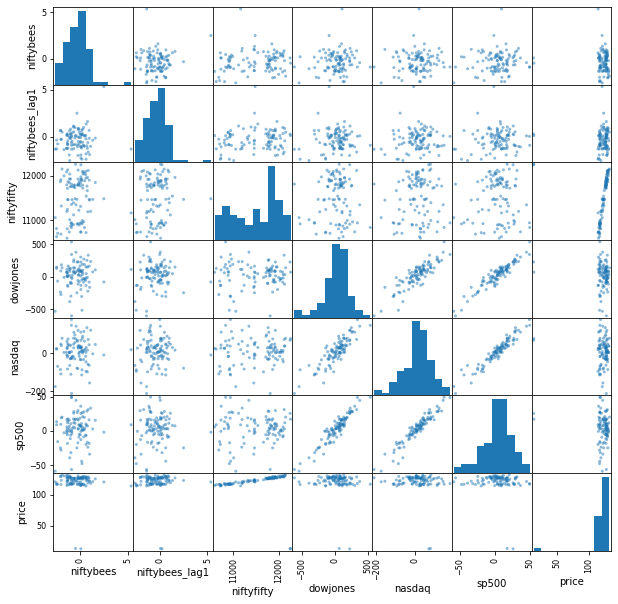

In [190]:
# plotting.
import pandas
from pandas.plotting import scatter_matrix
sm = scatter_matrix(train, figsize = (10,10))

In [169]:
#Applying correlation in train sample.
corr_array = train.iloc[ : , :-1].corr()['niftybees']

In [171]:
print(corr_array)

niftybees         1.000000
niftybees_lag1    0.075133
niftyfifty        0.141477
dowjones          0.114113
nasdaq            0.080345
Name: niftybees, dtype: float64


In [191]:
# Checking the entire summary of model.
formula = 'niftybees~niftybees_lag1+niftyfifty+dowjones+nasdaq+sp500'
lm = smf.ols(formula = formula , data = train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              niftybees   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.7270
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.605
Time:                        23:35:47   Log-Likelihood:                -150.65
No. Observations:                 100   AIC:                             313.3
Df Residuals:                      94   BIC:                             328.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.0059      2.776     -1.443      0.152      -9.517       1.505
niftybees_lag1     0.0481      0.103      0.467      0.642      -0.157       0.253
niftyfifty         0.0003      0.000      1.334      0.185      -0.000       0.001
dowjones           0.0013      0.002      0.654      0.514      -0.003       0.005
nasdaq            -0.0013      0.006     -0.222      0.825      -0.013       0.010
sp500             -0.0024      0.030     -0.079      0.937      -0.062       0.058
==============================================================================
Omnibus:                       43.481   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.567
Skew:                           1.341   Prob(JB):                     8.35e-41
Kurtosis:                       9.092   Cond. No.                     2.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

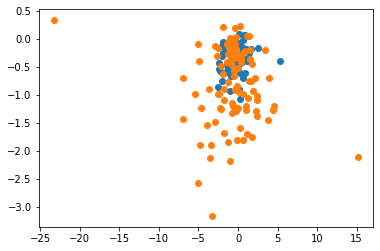

In [298]:
# prediction of train sample and test sample using Sctter matrix.
train['predictedY'] = lm.predict(train)
test['predictedY'] = lm.predict(test)
plt.scatter(train['niftybees'], train['predictedY'])                      #Orange 
plt.scatter(test['niftybees'], test['predictedY'])                        #Blue

In [257]:
# Developoing a method to calculate adjusted R^2 and RMSE.
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [262]:
# Comparing R^2 and RMSE of both the samples i.e train and test.
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [263]:
assessTable(test, train, lm, 4, 'niftybees')

,Train,Test
R2,-0.003307,-0.003088
RMSE,1.119854,3.777949


In [278]:
# Calculating profit via train sample , test sample and by passive way.
train['Order'] = [1 if sig>0 else -1 for sig in train['predictedY']]
train['Profit'] = train['niftybees'] * train['Order']
train['Train_Wealth'] = train['Profit'].cumsum()
print('Total profit made in Train: ', train['Profit'].sum())
test['Order'] = [1 if sig>0 else -1 for sig in test['predictedY']]
test['rofit'] = test['niftybees'] * test['Order']
test['Test_Wealth'] = test['rofit'].cumsum()
print('Total profit made in test: ', test['rofit'].sum())
buy_hold = (niftybees.loc[niftybees.index[-1],'Close'] - niftybees.loc[niftybees.index[0],'Close'])
print('Total profit made in Buy and Hold startegy i.e long: ' ,buy_hold)

Total profit made in Train:  34.99705700000006
Total profit made in test:  21.76001300000003
Total profit made in Buy and Hold startegy i.e long:  -18.82400600000001


In [294]:
# Stepping towards plotting the graph of passive startegy i.r buy and hoold or long.
niftybees['Close1'] = niftybees['Close'].shift(-1)
niftybees['long'] = niftybees['Close1'] - niftybees['Close']
niftybees['Passive_strategy'] = niftybees['long'].cumsum()

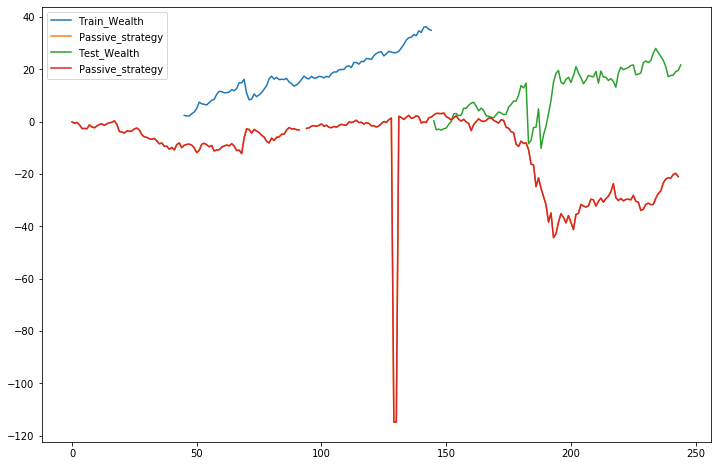

In [283]:
#comparing train , test and passive startegies graphically.
plt.figure(figsize = (12,8))
train['Train_Wealth'].plot(legend = True)
niftybees['Passive_strategy'].plot(legend = True)
test['Test_Wealth'].plot(legend = True)
niftybees['Passive_strategy'].plot(legend = True)

In [289]:
# initial inevestment in the price of 1 share .
train['Train_Wealth'] = train['Train_Wealth'] + train.loc[train.index[0], 'price']
test['Test_Wealth'] = test['Test_Wealth'] + test.loc[test.index[0], 'price']

In [305]:
# Calculating daily sharpe ratio and yearly shapre ratio.
train['Return'] = np.log(train['Wealth']) - np.log(train['Wealth'].shift(1))
dailyr = train['Return'].dropna()
print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))
x = (252**0.5)*dailyr.mean()/dailyr.std(ddof=1)

Daily Sharpe Ratio is  0.27577510980521625
Yearly Sharpe Ratio is  4.377794149956794


In [306]:
# Calculating daily sharpe ratio and yearly shapre ratio.
test['Return'] = np.log(test['Wealth']) - np.log(test['Wealth'].shift(1))
dailyr = test['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))
y = (252**0.5)*dailyr.mean()/dailyr.std(ddof=1)

Daily Sharpe Ratio is  0.1922537111226392
Yearly Sharpe Ratio is  3.051933049558534


In [307]:
# calculatin maximum downtrun of train.
train['Peak'] = train['Wealth'].cummax()
train['Drawdown'] = (train['Peak'] - train['Wealth'])/train['Peak']
print('Maximum Drawdown in Train is ', train['Drawdown'].max())
x1 = train['Drawdown'].max()

Maximum Drawdown in Train is  0.4835896829961477


In [308]:
# calculatin maximum downtrun of test.
test['Peak'] = test['Wealth'].cummax()
test['Drawdown'] = (test['Peak'] - test['Wealth'])/test['Peak']
print('Maximum Drawdown in Train is ', test['Drawdown'].max())
y1 = test['Drawdown'].max()

Maximum Drawdown in Train is  10.411910728361967


In [312]:
# overall conclusion .
assessment = pd.DataFrame(index = ['Sharpe_Ratio', 'Maximum_Drawdown'] , columns = ['Train_Data' , 'Test_Data'])
assessment['Train_Data'] = [x,x1]
assessment['Test_Data'] = [y,y1]
print(assessment) 



                  Train_Data  Test_Data
Sharpe_Ratio        4.377794   3.051933
Maximum_Drawdown    0.483590  10.411911
